<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_edu_intro_DL_NLP/blob/week_7_logging/logging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логирование

## Модуль logging



*   [Документация к модулю](https://docs.python.org/3/library/logging.html)
*   [Logging Cookbook](https://docs.python.org/3/howto/logging-cookbook.html)



In [ ]:
import logging

### Уровни логирования

*  `Debug` (10): самый низкий уровень логирования, предназначенный для отладочных сообщений, для вывода диагностической информации о приложении

*  `Info` (20): этот уровень предназначен для вывода данных о фрагментах кода, работающих так, как ожидается

*  `Warning` (30): этот уровень логирования предусматривает вывод предупреждений, он применяется для записи сведений о событиях, на которые программист обычно обращает внимание. Такие события вполне могут привести к проблемам при работе приложения. Если явно не задать уровень логирования — по умолчанию используется именно `warning`

*  `Error` (40): этот уровень логирования предусматривает вывод сведений об ошибках — о том, что часть приложения работает не так как ожидается, о том, что программа не смогла правильно выполниться

*  `Critical` (50): этот уровень используется для вывода сведений об очень серьёзных ошибках, наличие которых угрожает нормальному функционированию всего приложения. Если не исправить такую ошибку — это может привести к тому, что приложение прекратит работу

In [ ]:
# logging.<level>(<message>)

logging.debug('Используем когда ведем разработку')
logging.info('Все хорошо, так и задумано')
logging.warning('Возможно что-то пошло не так?')
logging.error('Что-то точно пошло не так!')
logging.critical('Все настолько не так, что дальше некуда !!!')

ERROR:root:Что-то точно пошло не так!
CRITICAL:root:Все настолько не так, что дальше некуда !!!


По умолчанию `logging` фиксирует только логи уровня `WARNING` и выше (т.е. ещё `ERROR` и `CRITICAL`), а все логи уровнями ниже — игнорирует (`DEBUG` и `INFO`).  

Это можно изменить в настройках логов. Основная функция для указания основных настроек — `basicConfig()`. У нее 3 основных параметра:
*   `level` — уровень логирования
*   `filename` — куда пишем логи
*   `format` — в каком виде их пишем
*   `filemode` — необязательный параметр, указывающий режим, в котором предполагается работать с файлом журнала, заданным параметром `filename`. Установка `filemode` в значение `w` (write, запись) приводит к тому, что логи перезаписываются при каждом запуске модуля. По умолчанию параметр `filemode` установлен в значение `a` (append, присоединение), то есть — в файл будут попадать записи из всех сеансов работы программы


In [ ]:
logging.basicConfig(level=logging.DEBUG)

### Вывод в файл

In [ ]:
LOGGING = 'logs.log'

In [ ]:
logging.basicConfig(
    level=logging.DEBUG,
    filename=LOGGING,
    filemode="w"
)

Записи в лог-файле имеют формат  `<logging-level>:<name-of-the-logger>:<message>`

По умолчанию `<name-of-the-logger>`, имя логгера, установлено в `root`

### Форматирование

In [ ]:
# process, levelname и message — атрибуты записи логов
logging.basicConfig(
    level=logging.DEBUG,
    format="%(process)d %(levelname)s %(message)s"
)

Чтобы один из атрибутов выводился, его нужно взять в скобки, поставить перед ним процент (`%`) и в конце указать тип значения

`d` — digit, число  
`s` — string, строка  

Другие полезные атрибуты логов представлены в таблице


|   Атрибут   | Как выглядит `format` |               Описание               |
|:-----------:|:---------------------:|:------------------------------------:|
| `asctime`   | `%(asctime)s`         | Время создания лога (Удобная запись) |
| `created`   | `%(created)f`         | Время создания лога (UTC)            |
| `pathname`  | `%(pathname)s`        | Полный путь до файла, где создан лог |
| `filename`  | `%(filename)s`        | В каком файле создан лог             |
| `funcName`  | `%(funcName)s`        | В какой функции создан лог           |
| `lineno`    | `%(lineno)d`          | На какой строке создан лог           |
| `message`   | `%(message)s`         | Сообщение, которое вы передали       |
| `levelname` | `%(levelname)s`       | Уровень лога                         |

Полную таблицу атрибутов можно [посмотреть в документации](https://docs.python.org/3/library/logging.html#logrecord-attributes)

In [ ]:
FORMAT = "%(asctime)s - %(module)s - %(levelname)s - %(funcName)s: %(lineno)d - %(message)s"
logging.basicConfig(
    level=logging.DEBUG,
    format=FORMAT,
    datefmt='%H:%M:%S',
    )

### Логирование ошибок

In [ ]:
def division(a: float, b: float) -> float:
    return a / b

Обычный лог

In [ ]:
try:
    division(1, 0)
except Exception as error:
    logging.error(error)

2023-10-28 13:24:43.037 | ERROR    | __main__:<cell line: 1>:2 - An error has been caught in function '<cell line: 1>', process 'MainProcess' (468), thread 'MainThread' (137739901038592):
Traceback (most recent call last):

  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Custom kernel launcher app to customize socket options.', '__package__': '', '__loader__...
           │         └ <code object <module> at 0x7d4611811420, file "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 1>
           └ <function _run_code at 0x7d46117ea200>
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Custom kernel launcher app to customize socket options.', '__package__': '', '__loader__...
         └ <code object <module> at 0x7d4611811420, file "/usr/loca

Лог вместе с трейсбеком

In [ ]:
try:
    division(1, 0)
except Exception as error:
    logging.error(error, exc_info=True)

ERROR:root:division by zero
Traceback (most recent call last):
  File "<ipython-input-13-afa80c47e2af>", line 2, in <cell line: 1>
    division(1, 0)
  File "<ipython-input-11-e6c305bbb976>", line 2, in division
    return a / b
ZeroDivisionError: division by zero


## Модуль loguru

[Репозиторий Loguru](https://github.com/Delgan/loguru)

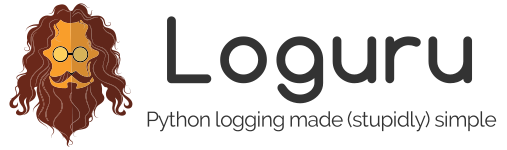

In [ ]:
%%capture
!pip install loguru

In [ ]:
from loguru import logger

In [ ]:
logger.add(LOGGING, level='DEBUG')

1

In [ ]:
logger.debug('Сообщение для дебагинга')
logger.info('Произошло какое-то событие. Всё идёт по плану.')
logger.warning('Предупреждение, что-то могло сломаться')
logger.error('Ошибка, что-то сломалось')
logger.critical('МЫ В ОГНЕ ЧТО ДЕЛАТЬ?!?!')

2023-10-28 13:09:48.077 | DEBUG    | __main__:<cell line: 1>:1 - Сообщение для дебагинга
2023-10-28 13:09:48.082 | INFO     | __main__:<cell line: 2>:2 - Произошло какое-то событие. Всё идёт по плану.
2023-10-28 13:09:48.085 | WARNING  | __main__:<cell line: 3>:3 - Предупреждение, что-то могло сломаться
2023-10-28 13:09:48.087 | ERROR    | __main__:<cell line: 4>:4 - Ошибка, что-то сломалось
2023-10-28 13:09:48.089 | CRITICAL | __main__:<cell line: 5>:5 - МЫ В ОГНЕ ЧТО ДЕЛАТЬ?!?!


In [ ]:
@logger.catch
def division(a: float, b: float) -> float:
  return a / b

In [ ]:
division(1, 0)

2023-10-28 13:09:48.104 | ERROR    | __main__:<cell line: 1>:1 - An error has been caught in function '<cell line: 1>', process 'MainProcess' (468), thread 'MainThread' (137739901038592):
Traceback (most recent call last):

  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Custom kernel launcher app to customize socket options.', '__package__': '', '__loader__...
           │         └ <code object <module> at 0x7d4611811420, file "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 1>
           └ <function _run_code at 0x7d46117ea200>
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Custom kernel launcher app to customize socket options.', '__package__': '', '__loader__...
         └ <code object <module> at 0x7d4611811420, file "/usr/loca

## Дополнительные материалы

*   [Продвинутые возможности модуля logging в Python](https://habr.com/ru/articles/513966/)
*   [Подробнее про модуль loguru (ru)](https://docs-python.ru/packages/modul-loguru-python/)


